In [1]:
!pip install prophet


In [2]:
import pandas as pd

file = "/content/instax_sales_transaction_data.csv"
df = pd.read_csv(file)
df.head()

,Tanggal,Tahun,Bulan,Hari,Kategori,Nama_Produk,Lokasi_Toko,Metode_Bayar,Harga_Satuan,Qty,Diskon_IDR,Total_Penjualan
0,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Tokopedia Official,Kartu Kredit,185000,1,9250,175750
1,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Tokopedia Official,Kartu Kredit,185000,1,0,185000
2,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Shopee Mall,E-Wallet (Gopay/OVO),185000,2,0,370000
3,2022-05-01,2022,5,Sunday,Kamera,Instax Mini 11,Shopee Mall,Paylater,1100000,1,0,1100000
4,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Shopee Mall,E-Wallet (Gopay/OVO),185000,2,0,370000


In [3]:
df = df.rename(columns={
    'Tanggal': 'Date',
    'Tahun': 'Year',
    'Bulan': 'Month',
    'Hari': 'Day',
    'Kategori': 'Category',
    'Nama_Produk': 'Product_Name',
    'Lokasi_Toko': 'Store_Location',
    'Metode_Bayar': 'Payment_Method',
    'Harga_Satuan': 'Unit_Price',
    'Qty': 'Quantity',
    'Diskon_IDR': 'Discount',
    'Total_Penjualan': 'Total_Sales'
})

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df.head()


,Date,Year,Month,Day,Category,Product_Name,Store_Location,Payment_Method,Unit_Price,Quantity,Discount,Total_Sales
0,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Tokopedia Official,Kartu Kredit,185000,1,9250,175750
1,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Tokopedia Official,Kartu Kredit,185000,1,0,185000
2,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Shopee Mall,E-Wallet (Gopay/OVO),185000,2,0,370000
3,2022-05-01,2022,5,Sunday,Kamera,Instax Mini 11,Shopee Mall,Paylater,1100000,1,0,1100000
4,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Shopee Mall,E-Wallet (Gopay/OVO),185000,2,0,370000


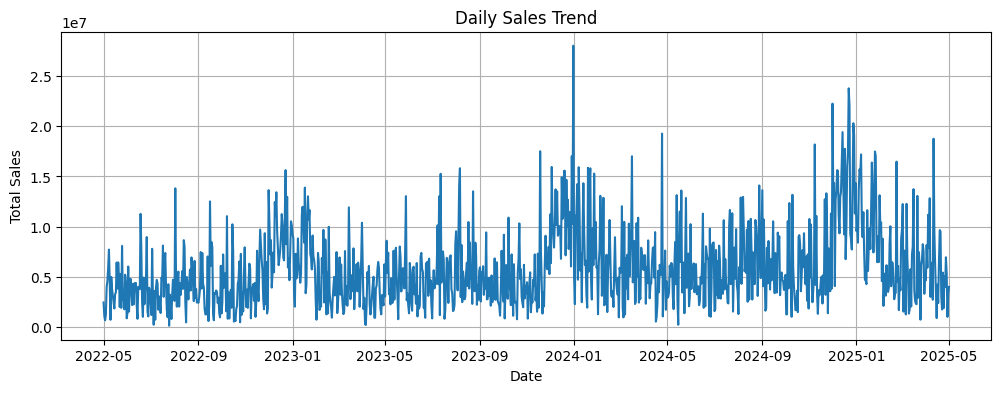

In [5]:
import matplotlib.pyplot as plt

# Daily total sales
daily_sales = df.groupby('Date')['Total_Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(12,4))
plt.plot(daily_sales['Date'], daily_sales['Total_Sales'])
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


In [6]:
from prophet import Prophet

forecast_df = daily_sales.rename(columns={'Date': 'ds', 'Total_Sales': 'y'})

model = Prophet()
model.fit(forecast_df)

future = model.make_future_dataframe(periods=30)  # Next 30 days
forecast = model.predict(future)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


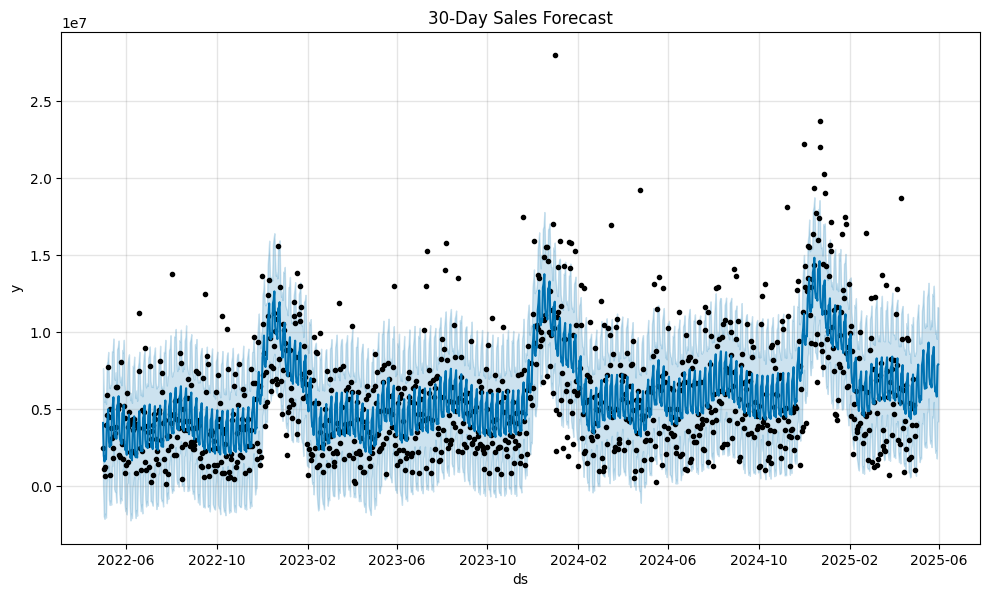

In [7]:
model.plot(forecast)
plt.title("30-Day Sales Forecast")
plt.show()


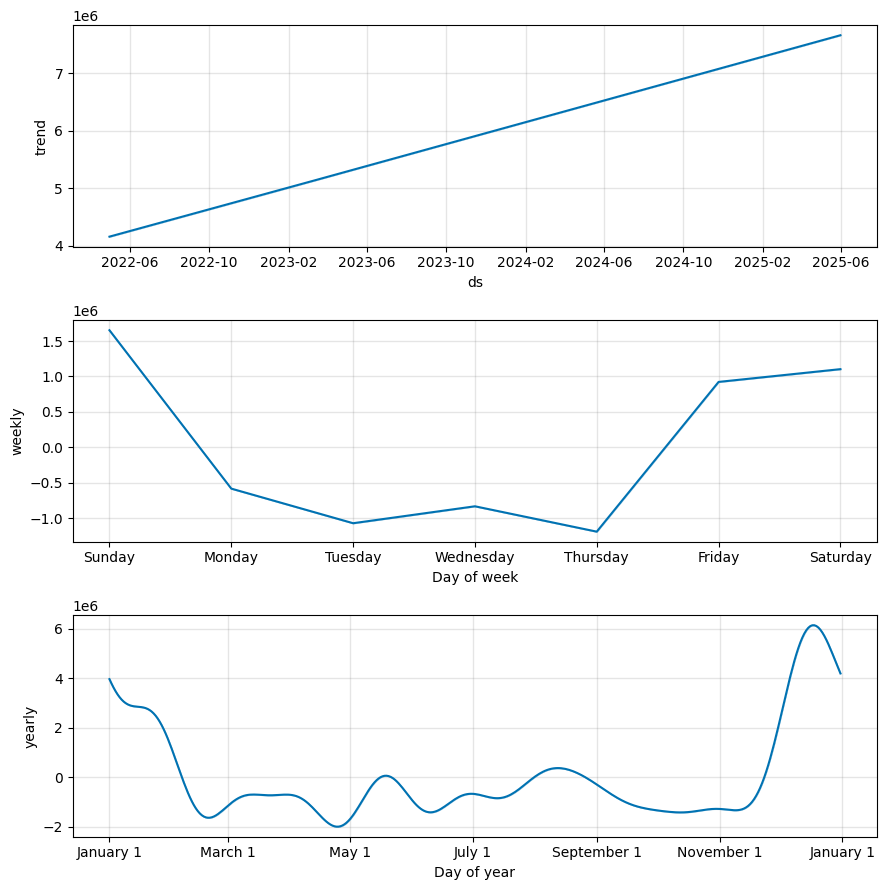

In [8]:
model.plot_components(forecast)
plt.show()


In [9]:
forecast[['ds','yhat']].tail(30).to_csv("/content/sales_forecast_30days.csv", index=False)
print("Forecast saved to: /content/sales_forecast_30days.csv")


Forecast saved to: /content/sales_forecast_30days.csv
